In [13]:
import numpy as np # using import we can gain access to the code in the numpy module
import sympy as sp # using import we can gain access to the code in the sympy module
from scipy.constants import* # we use import* here so that we can access (variables, classes and methods...) without prefixing 
# them with the modules name 
import matplotlib.pyplot as plt # here we can gain access to the code in the matplot.pyplot module
import matplotlib # here we can gain access to the code in the matplotlib module
matplotlib.use('nbagg')# we can use the feature 'nbagg' to enable interactive figures in a live notebook session 
%matplotlib nbagg



# information about bismuth and phosphorus including nuclear spin, electron spin, g-factor for electron, g-factor for nucleus 
# and value for the hyperfine coupling 

# donor   =  [I  , S  , g_e   ,  g_n ,  A(Hz) ]
bismuth    = [9/2,1/2,2.00032,0.9135,1475.17e6]                
phosphorus = [1/2,1/2,2.00032 ,2.263,117.53e6 ]

ub = physical_constants["Bohr magneton in Hz/T"][0] # defining the bohr magneton
Axx = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for x component
Ayy = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for y component
Azz = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for z component
Axx1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for x component
Ayy1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for y component
Azz1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for z component
un = physical_constants["nuclear magneton in MHz/T"][0]*1e6 # defining the nuclear magneton and converting to Hertz

print('Bohr magneton is ',ub,'Hz/T')
print('nuclear magneton is ',un,'Hz/T')

Bohr magneton is  13996245042.0 Hz/T
nuclear magneton is  7622593.285 Hz/T


In [14]:
(((e*hbar)/(2*m_e))/h) # how the bohr magneton is calculated. Using the charge of an electron, plancks constant (/2pi)
# , the mass of an electron

13996245038.264105

In [15]:
def ang_mo_op(J): # declaration of function that takes a value of the nuclear spin
                 
    N=int(2*J+1) # dimensions of spin matrix found by using the value of nuclear spin
    
    J_plus = np.zeros((N,N)) # Matrix of zeroes produced, which has the dimensions NxN
    J_minus = np.zeros((N,N)) # Second Matrix of zeroes produced, which has the dimensions NxN
    Jz = np.zeros((N,N)) # Third Matrix of zeroes produced, which has the dimensions NxN 
    
    for n in range (N): # sweeping through the different rows of the matrix 
        for m in range(N): # sweeping through the different columns of the matrix
            if n==m+1:
                J_plus[n,m] = (J*(J+1)-(J-n)*(J-n+1))**0.5 # calculating individual elements of matrix
            if n==m-1:
                J_minus[n,m] = (J*(J+1)-(J-m)*(J-m+1))**0.5 # calculating individual elements of matrix
            if n==m:
                Jz[n,m] = J-n # calculating individual elements of matrix
    
    Jx = 0.5*(J_plus+J_minus)
    Jy = -0.5*1j*(J_plus-J_minus)
    return (Jx,Jy,Jz) # this will return the x,y and z components of the nuclear spin



In [16]:
ge = 2.00032 # g-factor for electron
gn = 0.9135 # g-factor for nucleus 
we1 = (ub*ge/1e9)
we3 = (un*gn/1e9)
we12 = (ub*ge/1e6) # calculation of the electron zeeman energy
we32 = (un*gn/1e6) # calculation of the nuclear zeeman energy 
print('electron zeeman energy at 1T',we1,'GHz')
print('nuclear zeeman energy at 1T',we3,'GHz')

electron zeeman energy at 1T 27.996968882413437 GHz
nuclear zeeman energy at 1T 0.006963238965847499 GHz


In [17]:
Ix,Iy,Iz = ang_mo_op(9/2) # 9/2 is the nuclear spin of bismuth, and is input to the function ang_mo_op(), this returns the
# x, y and z component of the nuclear spin.

In [18]:
Id2 = np.identity(2) #2x2 identity matrix.
Id10 = np.identity(10) #10x10 identity matrix.
Sx1 = np.matrix([ # electron spin components are all defined with their respective spin matrices. 
    [0,1/2],
    [1/2,0]
])
Sy1 = np.matrix([
    [0,-1j/2],
    [1j/2,0]
])
Sz1 = np.matrix([
    [1/2,0],
    [0,-1/2]
])

In [19]:
def bismuth_matrix(B): # function defined which takes an input of a range of magnetic field values
    
    E1 = we1*B*Sz1 # E1 represents the calculation for the electron zeeman energy 
    E2 = we3*B*Iz  # E2 represents the calculation for the nuclear zeeman energy

    R1 = np.kron(Id10,E1) # so that the basis states are the same when adding all the energy Hamiltonians we have to take the 
    # kronecker product of a 10x10 identity matrix and the electron zeeman energy 
    R2 = np.kron(E2,Id2) # again we find the kronecker product between E2 and the 2x2 identity matrix so that the basis states
    # are the same
    
    # the following lines of code are to calculate the hyperfine interactions assuming Axx = Ayy = Azz
    T1 = np.kron(Id10,Sx1) # the kronecker product is used so that the basis states are the same 
    T2 = np.kron(Ix,Id2)    
    T12 = Axx*(T2*T1)
    
    T3 = np.kron(Id10,Sy1) # the kronecker product is used so that the basis states are the same 
    T4 = np.kron(Iy,Id2)
    T34 = Ayy*(T4*T3)
    
    T5 = np.kron(Id10,Sz1) # the kronecker product is used so that the basis states are the same 
    T6 = np.kron(Iz,Id2)
    T56 = Azz*(T6*T5)
    BMF = R1-R2+T56+T34+T12 # this provides the final Hamiltonian of the overall system 
    
    
    return(BMF) # this returns the final matrix wrt to the magnetic field value entered as input 

In [20]:
magnetic_sweep_list = np.linspace(0,0.6,1000) # this returns a set of evenly spaced magnetic field values over a specified 
# interval, in this case starting at the value of 0T to a value of 0.5T with 1000 points inbetween. 
rows = 20
len_magnetic_sweep_list = len(magnetic_sweep_list) 
energy = np.zeros((rows, len_magnetic_sweep_list))    
for j in range(len(magnetic_sweep_list)):  # sweeps through each value in the magnetic_sweep_list
    FM = bismuth_matrix(magnetic_sweep_list[j]) # each value in magnetic_sweep_list is input into the function final_matrix 
    # the resulting matrix has to now be diagonalized to find the corresponding eigenvalues

    eigenvalues , eigenvector =  np.linalg.eigh(FM)
    for i in range(rows):
        energy[i][j] = (eigenvalues[i])*-1

<IPython.core.display.Javascript object>


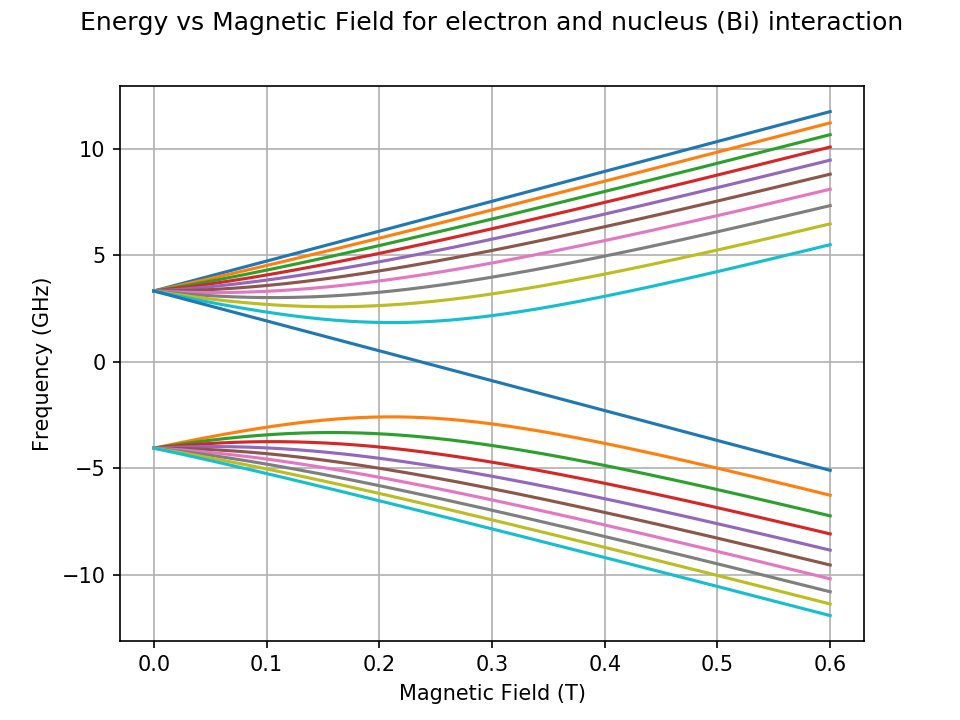

In [21]:
plt.figure()
for i in range(rows):
    plt.plot(magnetic_sweep_list,energy[i])
plt.xlabel('Magnetic Field (T)')
plt.ylabel('Frequency (GHz)')
plt.title('Energy vs Magnetic Field for electron and nucleus (Bi) interaction', y=1.08)
plt.grid()

In [22]:
import sys
np.set_printoptions(threshold=sys.maxsize) # so that the whole matrix can be seen when testing function

def Bihybrid1001(B,D): # taking the range of magnetic field and detuning values

    Bihy4040 = np.zeros((40,40)) # defines a matrix of zeros with dimensions 40x40
    E1 = we1*B*Sz1 # Zeeman energy of the electron
    E2 = we3*B*Iz  # Zeeman energy of the nucleus
    B1 = np.kron(Id10,E1)  # increasing basis for consistency
    B2 = np.kron(E2,Id2)   # increasing basis for consistency
    TC = 5
    TBT = np.zeros((20,20)) #20x20 zero matrix to be filled by diagonal of tunnel coupling values
    np.fill_diagonal(TBT,TC) # fills zeros matrix with tunnel coupling values
    DZ = np.zeros((20,20))   # 20x20 zero matrix to be filled by diagonal of detuning values
    np.fill_diagonal(DZ,D)   # fills zeros matrix with diagonal of detuning values
    Ze2020 = B1 + B2 + DZ    # Detuning added to Zeeman part of the matrix
    B3 = np.kron(Id10,Sx1)   # increasing basis for consistency
    B4 = np.kron(Ix,Id2)     # increasing basis for consistency
    H1 = Axx*(B4*B3)

    B5 = np.kron(Id10,Sy1) 
    B6 = np.kron(Iy,Id2)
    H2 = Ayy*(B6*B5)

    B7 = np.kron(Id10,Sz1)  
    B8 = np.kron(Iz,Id2)
    H3 = Azz*(B8*B7)
    Hy2020 = B1+B2+H1+H2+H3-DZ
    x = 0 # number of rows down (Zero index)
    y = 0 # number of columns across (Zero index)
    Bihy4040[x:x+Ze2020.shape[0], y:y+Ze2020.shape[1]] = Ze2020
    a = 0
    b = 20
    Bihy4040[a:a+TBT.shape[0], b:b+TBT.shape[1]] = TBT
    c = 20
    d = 0
    Bihy4040[c:c+TBT.shape[0], d:d+TBT.shape[1]] = TBT
    e = 20
    f = 20
    Bihy4040[e:e+Hy2020.shape[0], f:f+Hy2020.shape[1]] = Hy2020
    return(Bihy4040)

In [39]:
magnetic_sweep_list = np.linspace(0,0.5,1000) # this returns a set of evenly spaced magnetic field values over a specified 
# interval, in this case starting at the value of 0T to a value of 0.5T with 1000 points inbetween.
detuning_sweep_list = np.linspace(-13,13,1000)
rows = 40
len_magnetic_sweep_list = len(magnetic_sweep_list) 
energy = np.zeros((rows, len_magnetic_sweep_list))
# defines a matrix of zeroes that is the length of magnetic_sweep_list and 40 rows down

for j in range(len_magnetic_sweep_list):  # sweeps through each value in the magnetic_sweep_list
    Bihybrid1001F = Bihybrid1001(1.5,detuning_sweep_list[j]) # each value in magnetic_sweep_list is input into the function Bihybrid1001 
    # the resulting matrix has to now be diagonalized to find the corresponding eigenvalues
    eigenvalues , eigenvector =  np.linalg.eigh(Bihybrid1001F) # produces eigenvalues in correct order
    for i in range(rows):
        energy[i][j] = (eigenvalues[i])*-1 # each row in the zeros matrix filled with energy values 
  

C:\Users\devan\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


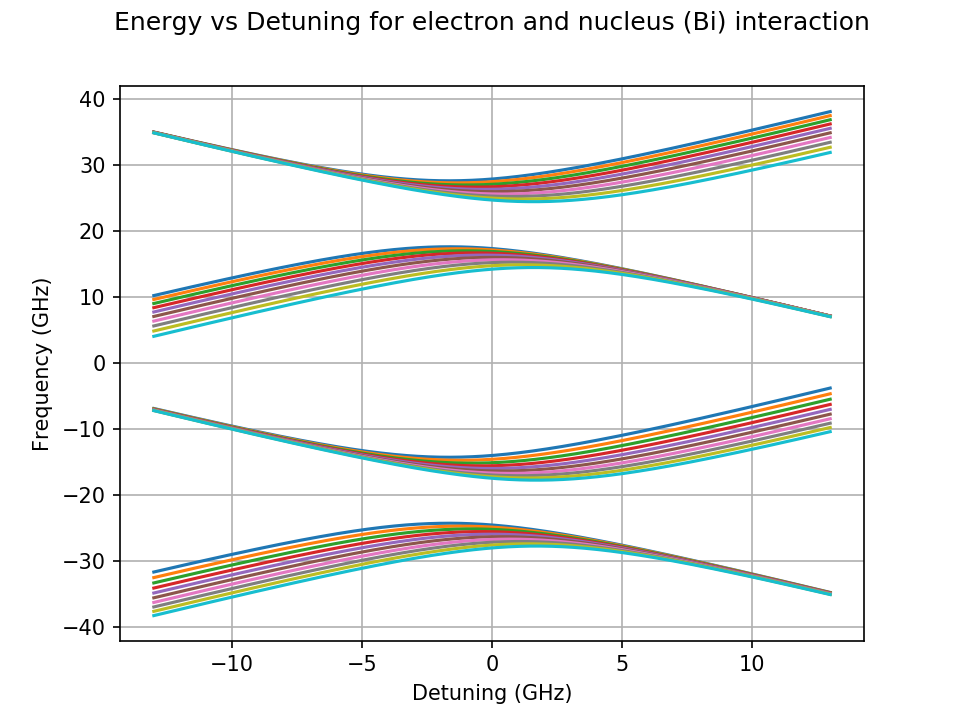

In [40]:
plt.figure()
for i in range(rows):
    plt.plot(detuning_sweep_list,energy[i])
plt.xlabel('Detuning (GHz)')
plt.ylabel('Frequency (GHz)')
plt.title('Energy vs Detuning for electron and nucleus (Bi) interaction', y=1.08)
plt.grid()

In [41]:
from scipy.interpolate import UnivariateSpline
x_range = np.linspace(detuning_sweep_list[0],detuning_sweep_list[999],1000)
dE2de2 = np.zeros((40, 1000)) # Matrix of zeros to contain second derivative values of energy with respect to detuning
for i in range(40):
    tmp = UnivariateSpline(detuning_sweep_list,energy[i],s=0,k=4).derivative(n=2) # Univariate spline interpolates energies 
    dE2de2[i] = tmp(x_range).reshape((1, 1000)) # reshaped to fit Matrix of zeros

<IPython.core.display.Javascript object>


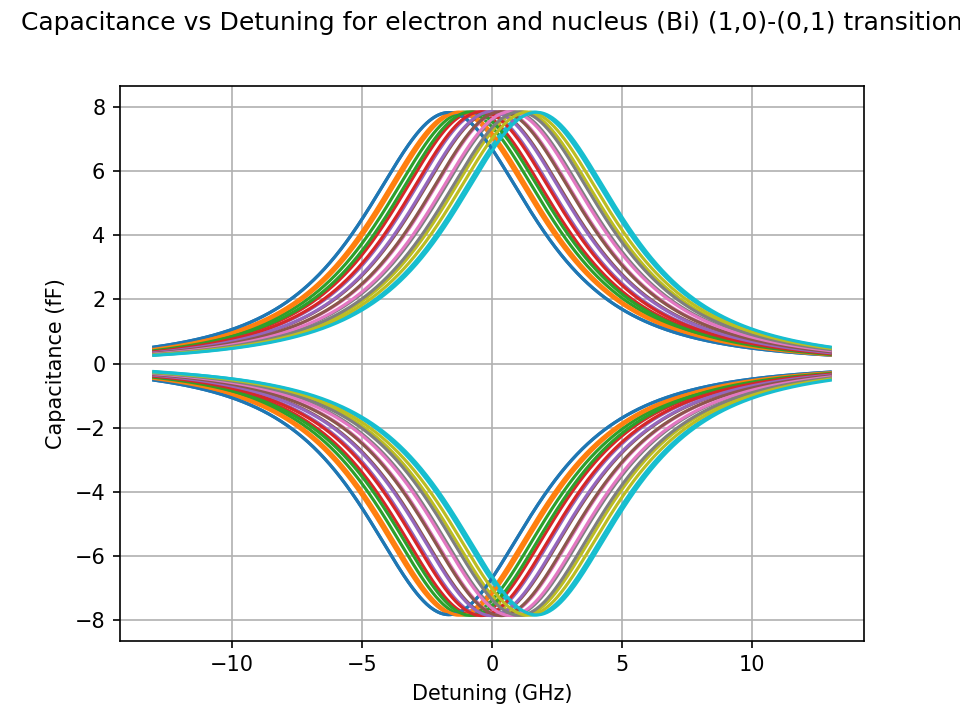

In [42]:
GHz = 1 
eV = GHz*4.1*10**-6 # conversion from GHz to eV
alpha = 1 # constant of proportionality has a value of 1 at resonance  
plt.figure()
for i in range(rows):
    plt.plot(x_range,((e*alpha)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[i])
plt.xlabel('Detuning (GHz)')
plt.ylabel('Capacitance (fF)')
plt.title('Capacitance vs Detuning for electron and nucleus (Bi) (1,0)-(0,1) transition', y=1.08)
plt.grid()

In [17]:


def Default_case ():  
    print("Wrong entry! The number must be valid") # Default case if user inputs are incorrect


Spin_Dict = { # dictionary from which the spin state can be chosen
    "9/2": "0",
    "7/2": "1", 
    "5/2": "2",
    "3/2": "3",
    "1/2": "4",
    "-1/2": "5",
    "-3/2": "6",
    "-5/2": "7",
    "-7/2": "8",
    "-9/2": "9",
}

def Execute_Spin_num():
    flag = 0 # if flag = 0 then spin states are produced, if flag = 1 then capacitance is calculated
    plt.figure()
    
    
    for i in range(10):
        spin_num = input("Enter a spin value from -9/2 to 9/2: ") 
    
        onepop = float(input("Enter first population value: "))
        twopop = float(input("Enter second population value: "))
        threepop = float(input("Enter third population value: "))
        fourthpop = float(input("Enter fourth population value: "))
        
        offset = Spin_Dict.get(spin_num,Default_case) # as eigenvalues are in order depending on spin state an offset is added
        # to chose the correct energies for that spin.
        offset = int(offset)
        Cq1 = ((e*k)**2/(eV*1.6*10**-19))*dE2de2[0 + offset]
        Cq2 = ((e*k)**2/(eV*1.6*10**-19))*dE2de2[10 + offset]
        Cq3 = ((e*k)**2/(eV*1.6*10**-19))*dE2de2[20 + offset]
        Cq4 = ((e*k)**2/(eV*1.6*10**-19))*dE2de2[30 + offset]
        
        P1 = onepop*Cq1+twopop*Cq2+threepop*Cq3+fourthpop*Cq4 # averaged quantum capacitance found when thermal populations 
        #entered
        
        if flag == 0:
            print("Zero")
            plt.plot(detuning_sweep_list,energy[0 + offset])
            plt.plot(detuning_sweep_list,energy[10 + offset])
            plt.plot(detuning_sweep_list,energy[20 + offset])
            plt.plot(detuning_sweep_list,energy[30 + offset])
        elif flag == 1:
            print("One")
            plt.plot(detuning_sweep_list,P1)
    
        
        spin_more = input("Do you want to add another spin value?")

        if spin_more == "No":
            break
    
    if flag == 0:  
        plt.xlabel('Detuning (GHz)')
        plt.ylabel('Frequency (GHz)')
        plt.title('Freq vs Magnetic Field for electron and nucleus (Bi) inter with tc and d', y=1.08)
        plt.grid()
    elif flag == 1:
        plt.xlabel('Detuning (GHz)')
        plt.ylabel('Quantum Capacitance (F)')
        plt.title('Freq vs Magnetic Field for electron and nucleus (Bi) inter with tc and d', y=1.08)
        plt.grid()

In [ ]:
Execute_Spin_num()